In [1]:
import numpy as np
import pandas as pd

import seaborn as sb
sb.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

from pylab import rcParams
rcParams['figure.figsize'] = 10, 8 

from collections import Counter

In [7]:
enrollment = pd.read_csv('data.csv')
enrollment.head()

,year,roll,unem,hgrad,inc
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112


In [8]:
enrollment.columns = ['year', 'roll', 'unem', 'hgrad', 'inc']

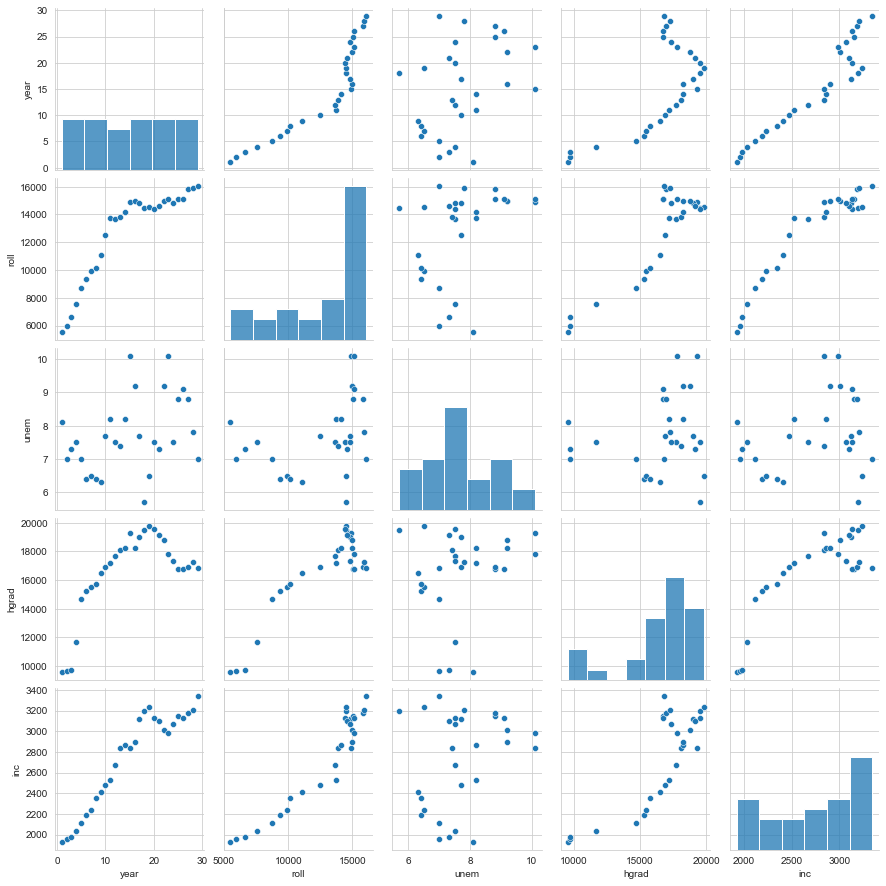

In [9]:
sb.pairplot(enrollment)

In [10]:
print(enrollment.corr())

           year      roll      unem     hgrad       inc
year   1.000000  0.900934  0.378305  0.670300  0.944287
roll   0.900934  1.000000  0.391344  0.890294  0.949876
unem   0.378305  0.391344  1.000000  0.177376  0.282310
hgrad  0.670300  0.890294  0.177376  1.000000  0.820089
inc    0.944287  0.949876  0.282310  0.820089  1.000000


In [12]:
enrollment_data = enrollment[['unem', 'hgrad']].values
enrollment_target = enrollment[['roll']].values
enrollment_data_names = ['unem', 'hgrad']

X, y = scale(enrollment_data), enrollment_target

In [13]:
# Missing Values
missing_values = X == np.NAN
X[missing_values == True] 

array([], dtype=float64)

In [14]:
LinReg = LinearRegression()

LinReg.fit(X, y)

print(LinReg.score(X, y))

0.8488812666133723


In [15]:
print('intercept: ', LinReg.intercept_)
print('slope: ', LinReg.coef_)

intercept:  [12707.03448276]
slope:  [[ 770.62314759 2710.00681553]]


In [16]:
y_pred = LinReg.predict(X)
print('prediction: ', y_pred, sep='\n')

prediction: 
[[ 6400.84932255]
 [ 5753.36581515]
 [ 6010.90237422]
 [ 7973.86171426]
 [10460.03870404]
 [10597.0211693 ]
 [10873.20661363]
 [11028.58396872]
 [11691.84854846]
 [13035.9696292 ]
 [13680.03635051]
 [13666.15619311]
 [13974.18239865]
 [14681.67664699]
 [16990.23857961]
 [15340.36915072]
 [15021.34696191]
 [14103.4873408 ]
 [14940.07351822]
 [15399.00332878]
 [14855.11293181]
 [15858.62142077]
 [15581.53468194]
 [13286.41862069]
 [13677.79947547]
 [13880.68397698]
 [13837.0442639 ]
 [13427.11284979]
 [12477.45344981]]


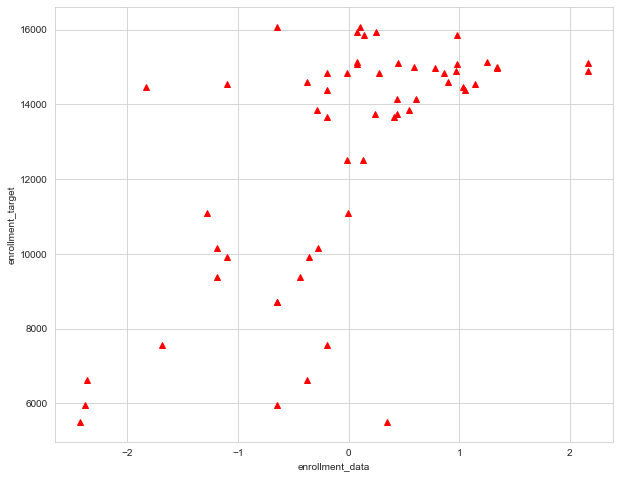

In [17]:
plt.plot(X, y, 'r^')
plt.xlabel('enrollment_data')
plt.ylabel('enrollment_target')
plt.show()